Importing Required Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

Importing the Data

In [2]:
points = np.genfromtxt('dataset.csv', delimiter=',')
x = np.array(points[:,0]) #Column Extractions
y = np.array(points[:,1]) #Column Extractions

Plotting the Data

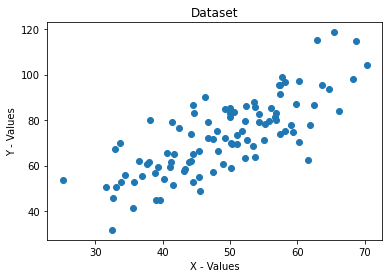

In [3]:
plt.scatter(x,y)
plt.xlabel('X - Values')
plt.ylabel('Y - Values')
plt.title('Dataset')
plt.show()

Defining the Hyperparameters

In [4]:
learning_rate = 0.0001
initial_theta0 = 0
initial_theta1 = 0
num_iterations = 30

Defining the Cost Function

In [5]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ((m * x + b) - y) ** 2
    return total_cost/N

Defining Gradient Descent Function

In [6]:
def gradient_descent(points, starting_theta0, starting_theta1, learning_rate, num_iterations):
    b = starting_theta0
    m = starting_theta1
    cost_graph = []
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m, cost_graph]

In [7]:
def step_gradient(theta0_current, theta1_current, points, learning_rate):
    theta1_gradient = 0
    theta0_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        theta1_gradient += - (2/N) * x * (y - (theta1_current * x + theta0_current))
        theta0_gradient += - (2/N) * (y - (theta1_current * x + theta0_current))
    theta1_updated = theta1_current - learning_rate * theta1_gradient
    theta0_updated = theta0_current - learning_rate * theta0_gradient
    return theta1_updated, theta0_updated

Executing Gradient Descent to get optimised parameters

In [8]:
theta0, theta1, cost_graph = gradient_descent(points, initial_theta0, initial_theta1, learning_rate, num_iterations)
print ('Optimized theta 0:', theta0)
print ('Optimized theta 1:', theta1)    
print ('Minimized cost:', compute_cost(theta0, theta1, points))

Optimized theta 0: 1.450983114951586
Optimized theta 1: 1.4510454848586645
Minimized cost: 111.87218458544208


Plotting Cost per Iterations

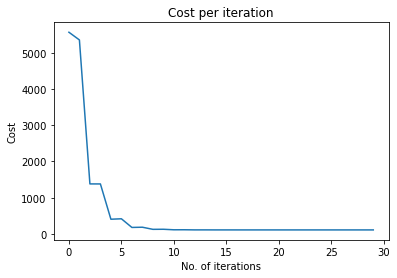

In [9]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Plot line of Best Fit

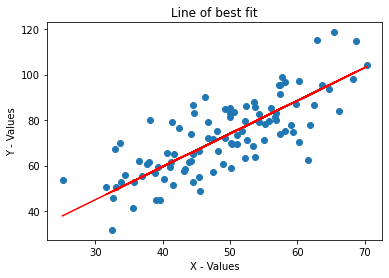

In [10]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = theta1 * x + theta0
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('X - Values')
plt.ylabel('Y - Values')
plt.title('Line of best fit')
plt.show()

Predicting Future Values

In [11]:
d = float(input("Enter X-Value: "))
print("Corresponding Y-Value:", theta1 * d + theta0)

Corresponding Y-Value: 74.0032573578848


Error in the model

In [12]:
error = r2_score(y, pred)
print(error)

0.5927778080726569
